# Introduction

This notebook concerns sea surface remote sensing. Large data volume precludes running 
this notebook in **`binder`**.


## Objectives


- Identify the chlorophyll data products of interest
- Order and retrieve; as NetCDF files
- Open an example to see dimensions, coordinates, data and attributes
- Get a sense of the effective depth of the MODIS chlorophyll products
- Display the data using a color scheme
- Pull a time series of values corresponding to location and working time range of shallow profilers
- Compare the surface values and variability with RCA data


It would be good to work the same comparison with sea surface temperature. 


### Identify surface chlorophyll concentration data products


Let's beging by navigating the Goddard data portal.
The starting point for getting and viewing data is the [**MODIS** site](https://modis.gsfc.nasa.gov/)
hosted by NASA Goddard. Here we have a choice of going for **data** or **tools**. Let's begin with 
[data](https://modis.gsfc.nasa.gov/data/) and from here go to 
[ocean color products](https://oceancolor.gsfc.nasa.gov/).
From here it seems there is another branch: Go to the Ocean Biology Distributed Active Archive Center
or OB.DAAC; *or* try and continue through the dropdown menus. I follow the latter path as it 
seems more direct.

- [Ocean color file format web page](https://oceancolor.gsfc.nasa.gov/docs/format/)
    - Binned data may include subordinate files. Binning is just quantization
    - SMI stands for Standard Mapped Image products; produced from binned data
    - Let's try out the [Level 3 browser](https://oceancolor.gsfc.nasa.gov/l3/)
        - Do everything twice: Once for Aqua, once for Terra
        - Use Extract (not Download) to select a bounding box
        - Bounding box goes from coast out to the Juan de Fuca west plate boundary
            - North 49.0, West -130.5, East -122.5, South 43.0
        - Starting "easy" with monthly products; 8-day products still have a lot of missing data
        - Order can be confirmed in browser (takes a few minutes) or by email (ditto)
            - Results persist for a week or so; don't forget to do Terra and Aqua both
- Have not yet examined the [Ocean Data Product Users Guide](https://oceancolor.gsfc.nasa.gov/docs/format/Ocean_Data_Product_Users_Guide.pdf)
- Here is the helpful [How to download data page](https://oceancolor.gsfc.nasa.gov/data/download_methods).
- Another option: [NASA Earth Observations (NEO)](https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MY1DMW_CHLORA&date=2019-02-01) site
    - No bounding box
    - Monthly or 8-day
    - `Download raw data` yields 45MB NetCDF files with 0.1 deg (11km) resolution
    
    
### Retrieve order data

- Download the file `http_manifest.txt` and place the contents in a browser address bar
    - This opens a "save `requested_files_1.tar` dialog box: Save and use `tar -xvf`
    - Since I ordered 1 year at monthly intervals with end time = 01-JAN-2019... it gave me 13 files 


## Other aspects of data access

- MODIS Web Mapping Service [Installation website](https://lpdaac.usgs.gov/data_access/web_map_services_wms)


In [2]:
import os, sys, time, glob, warnings
from IPython.display import clear_output             # use inside loop with clear_output(wait = True) followed by print(i)
warnings.filterwarnings('ignore')
this_dir = os.getcwd()
data_dir = this_dir + '/../../data'                  # large datasets reside outside the repository

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64

# convenience functions abbreviating 'datetime64' and so on
def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')
def day_of_month_to_string(d): return str(d) if d > 9 else '0' + str(d)

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


In [3]:
# to do: explain what is going on here (?) archaic
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'  # default is ‘last_expr’
# automatically reload external modules such as golive_library if they have changed
# %load_ext autoreload
# %autoreload 2

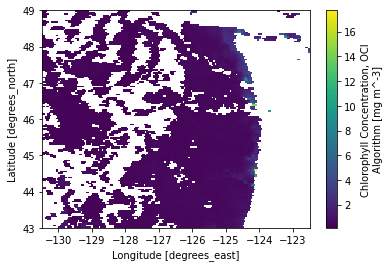

In [11]:
datadir = "/mnt/d/data/MODIS/Aqua/2018/monthly/"
datafile = datadir + "A20180012018031.L3m_MO_CHL.x_chlor_a.nc"
ds = xr.open_dataset(datafile)
ds.chlor_a.plot()

In [16]:
# bounding box latitude 43 - 47, longitude -123 - -131

datadir = os.getenv("HOME") + "/modis2019/"
datafile = datadir + "A2019283.L3b_DAY_CHL.x.nc"
ds = xr.open_dataset(datafile)
ds
# ds.MODISA_L3b_DAY_CHL.plot(figsize=(12,12))

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/48)
    product_name:                      A2019283.L3b_DAY_CHL.x.nc
    title:                             MODIS Level-3 Binned Data
    instrument:                        MODIS
    platform:                          Aqua
    temporal_range:                    day
    start_orbit_number:                92731
    ...                                ...
    processing_level:                  L3 Binned
    cdm_data_type:                     point
    identifier_product_doi_authority:  https://dx.doi.org
    identifier_product_doi:            10.5067/AQUA/MODIS/L3B/CHL/2018
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    keywords:                          Earth Science > Oceans > Ocean Chemist...

In [2]:
ds_modis = xr.open_mfdataset()
ds_modis_0 = ds_modis[0]

print(ds_modis_0.MODISA_L3m_SST_2014_sst)
print(ds_modis_0.lat.values[0], modis.lon.values[0], modis.lat.values[-1], modis.lon.values[-1])
modisplot = ds_modis_0.MODISA_L3m_SST_2014_sst.plot(figsize=(12,12))

TypeError: open_mfdataset() missing 1 required positional argument: 'paths'

In [ ]:
# bug: This does not work properly yet

# plt.savefig(data + '/images/modis_SST.png')
import matplotlib
img=matplotlib.image.imread(image_d + 'modis_sst.png')
imgplot = plt.imshow(img)
# plt.show()

# The goal is to overlay an image (created earlier; .png file) with a controllable opacity
# 
# How I got to opacity control through a sequence of print statements: 
#   print(thisMap)
#   print(thisMap.layers)
#   print(thisMap.layers[1])                    which is cheating by hardcoding the layer index as 1
#   print(thisMap.layers[1].opacity)
#   therefore setting thisMap.layers[1].opacity = 0.2 works just fine

def ChangeMapOpacity(opacity):thisMap.layers[1].opacity = opacity

from ipyleaflet import Map, ImageOverlay, WMSLayer
opacity = 0.7
thisMap = Map(center=(47, -129), zoom=5, layout=Layout(width='100%', height='600px'))
# The path to the image for overlay is relative; I could not get an absolute path to work...
sourceImage =  '../data/images/modis_sst.png'
image_layer = ImageOverlay(url=sourceImage, bounds=((40.2, -138.58), (53.8, -122.45)), opacity=opacity)
thisMap.add_layer(image_layer)


interact(ChangeMapOpacity, opacity = widgets.FloatSlider(min=0., max=1., step=0.025, value=opacity, 
      continuous_update=False, display='Opacity'))

# It seems that 'thisMap' must be the last line of code in the cell, hence placing interact() above
thisMap

# The following works but does not track zoom with new higher resolution tiles
# wms = WMSLayer(url="https://demo.boundlessgeo.com/geoserver/ows?",layers="nasa:bluemarble")
# thisMap.add_layer(wms)
    

# This cell selects out MODIS-derived sea surface temperature in deg C at specific locations
#   This is for comparative work with in situ sensors in the Regional Cabled Observatory, which is
#   in turn part of the NSF-sponsored Ocean Observing Initiative

# OSB data coughs up 44.52897 -125.38966

eoLat, eoLon, eoDep          = 44. + 22./60. + 10./3600., -(124. + 57./60. + 15./3600.),  582.
osbLat, osbLon, osbDep       = 44. + 30./60. + 55./3600., -(125. + 23./60. + 23./3600.), 2906.
shrLat, shrLon, shrDep       = 44. + 34./60. +  9./3600., -(125  +  8./60. + 53./3600.),  778.
axbLat, axbLon, axbDep       = 45. + 49./60. +  5./3600., -(129. + 45./60. + 13./3600.), 2605.
ashesLat, ashesLon, ashesDep = 45. + 56./60. +  1./3600., -(130. +  0./60. + 50./3600.), 1543.
axcLat, axcLon, axcDep       = 45. + 57./60. + 17./3600., -(130. +  0./60. + 32./3600.), 1528.
axeLat, axeLon, axeDep       = 45. + 56./60. + 23./3600., -(129. + 58./60. + 27./3600.), 1516.
axiLat, axiLon, axiDep       = 45. + 53./60. + 35./3600., -(129. + 58./60. + 44./3600.), 1520.
ca = [('Endurance Offshore',                eoLat,    eoLon,    eoDep, 'Endurance Offshore'),
      ('Oregon Slope Base',                osbLat,   osbLon,   osbDep, 'Oregon Slope Base'),
      ('Southern Hydrate Ridge',           shrLat,   shrLon,   shrDep, 'Southern Hydrate Ridge'),
      ('Axial Base',                       axbLat,   axbLon,   axbDep, 'Axial Base'),
      ('Axial ASHES Vent Field',         ashesLat, ashesLon, ashesDep, 'Inferno vent'),
      ('Axial Caldera Center',             axcLat,   axcLon,   axcDep, 'Axial Caldera Center'),
      ('Axial Caldera East',               axeLat,   axeLon,   axeDep, 'Axial Caldera East'),
      ('Axial International Vent Field',   axiLat,   axiLon,   axiDep, 'Axial International Vent Field')
    ]

# for i in ca: print(i[0], i[1], i[2])
# for i in range(3): for j in range(3): print(m.MODISA_L3m_SST_2014_sst[0][i][j].values)
# 
# testLat = ca[1][1]       #   44.51528
# testLon = ca[1][2]       # -125.38972
# print(testLat, testLon)

sst = []
for i in range(len(ca)):
    # print(m.MODISA_L3m_SST_2014_sst.sel(lat=ca[i][1], lon=ca[i][2], method = 'nearest'))
    temp = modis.MODISA_L3m_SST_2014_sst.sel(lat=ca[i][1], lon=ca[i][2], method = 'nearest').values
    sst.append(round(float(temp[0]), 2))

# Here are MODIS-derived day-time sea surface temperatures at the cabled array locations on 2016-01-01T00:15:10 
print(sst)

# And this works properly albeit with limited tiling resolution
from ipyleaflet import Map, WMSLayer
wms = WMSLayer(
url="https://demo.boundlessgeo.com/geoserver/ows?",
layers="nasa:bluemarble"
)
m = Map(layers=(wms, ), center=(42.5531, -48.6914), zoom=3)
m

def pp(ds):
    ds['time'] = xr.Variable('time', [pd.Timestamp(ds.attrs['time_coverage_start']) + pd.Timedelta(15, unit='d')])
    return ds

cb=xr.open_mfdataset('modis_chlora_2017_*.nc', preprocess = pp, concat_dim='time').chlor_a.to_dataset()
# cb.chlor_a shows units as mg / cubic meter, numerically equivalent to ug / liter

p,a=plt.subplots(figsize=(13,9))

for x in np.arange(-125.38966-0.1, -125.38966+0.1, 0.1):
    for y in np.arange(44.52897-0.1, 44.52897+0.1, 0.1):
        a.plot(cb.time.values, cb.chlor_a.sel(lon=x, lat=y, method='nearest').values, 'o-')

# cb.to_netcdf('modis_chlora_5_month_timeseries.nc')

cb

latselect = np.arange(44.52897-1., 44.52897+1.00001, 0.10)
lonselect = np.arange(-125.38966-1., -125.38966+1.00001, 0.10)
local = cb.sel(lat = latselect, lon = lonselect, method = 'nearest')
local

%%time
p,a=plt.subplots(figsize=(13,9))
for i in range(9,12):
    for j in range(9,12):
        a.plot(local.time.values, local.chlor_a.isel(lat=i,lon=j).values, 'o-')

a.plot(local.time.values, local.chlor_a.isel(lat=10,lon=10).values, 'o-', linewidth=6)

local.to_netcdf('local.nc')

local=xr.open_dataset('local.nc')
local

l1

# p,a=plt.subplots(figsize=(13,9))
# for t in l1.chlor_a: print(t)  
# a.plot(local.time.values, t.values, 'o-')

for i in range(21): 
    for j in range(21): 
        print(l1.chlor_a[0:5, i, j].values)

local = cb.reindex_like()

local.chlor_a[0].plot(figsize=(14,9),cmap=plt.cm.rainbow,vmin=0.00, vmax=4.0)
plt.xlim(-128,-124); plt.ylim(43.5,45.5); plt.plot(-125.38966, 44.52897, '^')

local.chlor_a[1].plot(figsize=(14,9),cmap=plt.cm.rainbow,vmin=0.00, vmax=4.0)
plt.xlim(-128,-124); plt.ylim(43.5,45.5); plt.plot(-125.38966, 44.52897, '^')

local.chlor_a[2].plot(figsize=(14,9),cmap=plt.cm.rainbow,vmin=0.00, vmax=4.0)
plt.xlim(-128,-124); plt.ylim(43.5,45.5); plt.plot(-125.38966, 44.52897, '^')

local.chlor_a[3].plot(figsize=(14,9),cmap=plt.cm.rainbow,vmin=0.00, vmax=4.0)
plt.xlim(-128,-124); plt.ylim(43.5,45.5); plt.plot(-125.38966, 44.52897, '^')

local.chlor_a[4].plot(figsize=(14,9),cmap=plt.cm.rainbow,vmin=0.00, vmax=4.0)
plt.xlim(-128,-124); plt.ylim(43.5,45.5); plt.plot(-125.38966, 44.52897, '^')

ca=xr.open_rasterio('./chlora.tif').to_dataset(name='chlora')
ca



ca.chlora

cad=ca.where(ca.chlora<1.4)
cad.chlora.plot(figsize=(14,9),cmap=plt.cm.rainbow,vmin=0.00, vmax=1.0)
plt.xlim(-128,-124)
plt.ylim(43.5,45.5)
plt.plot(-125.38966, 44.52897, '^')
# a=p.axes()
# a.set(xlim=(-155,-135))

float(ca.sel(band=0,y=44.52897,x=-125.38966, method='nearest').values)

for x in np.arange(-125.5, -125.0, 0.1):
    for y in np.arange(44.3, 44.8, 0.1):
        print(float(ca.sel(band=0,y=y,x=x, method='nearest').values))